<a href="https://colab.research.google.com/github/kprains/MM_2024/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [107]:
!pip install pandas scikit-learn seaborn scipy

In [108]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [109]:
# Загрузка набора данных
df = pd.read_csv('/content/income.csv')

In [110]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [111]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [113]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [114]:
# # генерируем случайную последовательность
# np.random.seed(42)
# df_test_nan = df.copy()
# df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'alcohol'] = np.nan

In [115]:
# # Проверка на пропущенные значения
# print(df_test_nan.isnull().sum()) # пропусков нет

In [116]:
# Вариант 1: Удаление строк с пропусками
df_drop = df.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [117]:
# Вариант 2: Заполнение пропусков частым значением
df_median = df.copy()
# этом коде мы используем mode() вместо median(), что возвращает наиболее частое значение в столбце.является категориальным признаком
df_median.workclass = df_median.workclass.fillna(df_median.workclass.mode()[0])
df_median.occupation = df_median.occupation.fillna(df_median.occupation.mode()[0])
df_median['native-country'] = df_median['native-country'].fillna(df_median['native-country'].mode()[0])

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [118]:
# Вариант 3: Заполнение пропусков K-ближайших соедей
import pandas as pd
from sklearn.impute import KNNImputer

# Создание копии DataFrame
df_mean = df.copy()

# Преобразуем все категориальные переменные в числовые для KNN
# Убедитесь, что все переменные, которые являются категориальными, кодируются
categorical_cols = ['workclass', 'occupation', 'native-country', 'education', 'marital-status', 'relationship', 'race', 'sex']
df_mean_encoded = pd.get_dummies(df_mean, columns=categorical_cols, drop_first=True)

# Проверка типов данных
print("Типы данных перед KNNImputer:")
print(df_mean_encoded.dtypes)

# Убедимся, что все данные числовые
df_mean_encoded = df_mean_encoded.apply(pd.to_numeric, errors='coerce')

# Инициализация KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Проведение иммитации KNN
try:
    df_mean_imputed = imputer.fit_transform(df_mean_encoded)
except Exception as e:
    print(f"Произошла ошибка: {e}")

# Преобразуем обратно в DataFrame
df_mean_imputed = pd.DataFrame(df_mean_imputed, columns=df_mean_encoded.columns)

# Проверяем, заполнены ли пропуски
print("\n# Заполнение пропусков с помощью KNN")
print(df_mean_imputed.isnull().sum())


Типы данных перед KNNImputer:
age                        int64
education-num              int64
capital-gain               int64
capital-loss               int64
hours-per-week             int64
                           ...  
race_Asian-Pac-Islander     bool
race_Black                  bool
race_Other                  bool
race_White                  bool
sex_Male                    bool
Length: 97, dtype: object

# Заполнение пропусков с помощью KNN
age                        0
education-num              0
capital-gain               0
capital-loss               0
hours-per-week             0
                          ..
race_Asian-Pac-Islander    0
race_Black                 0
race_Other                 0
race_White                 0
sex_Male                   0
Length: 97, dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная workhorse -> которая была преобразована из hours-per-week (если качество >= 40, то человек считается рабочей лошадкой, иначе нет)```

In [119]:
df['workhorse'] = np.where(df['hours-per-week'] >= 40, 1, 0).astype(int)

In [120]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'workhorse'],
      dtype='object')

In [121]:
Y = df['workhorse'] # выбираем целевую переменную (категориальную)
X = df.drop('workhorse', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('hours-per-week', axis=1)

5. **Графический анализ**

In [122]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,age,education-num,capital-gain,capital-loss,income >50K
0,39,13,2174,0,0
1,50,13,0,0,0
2,38,9,0,0,0
3,53,7,0,0,0
4,28,13,0,0,0
...,...,...,...,...,...
32556,27,12,0,0,0
32557,40,9,0,0,1
32558,58,9,0,0,0
32559,22,9,0,0,0


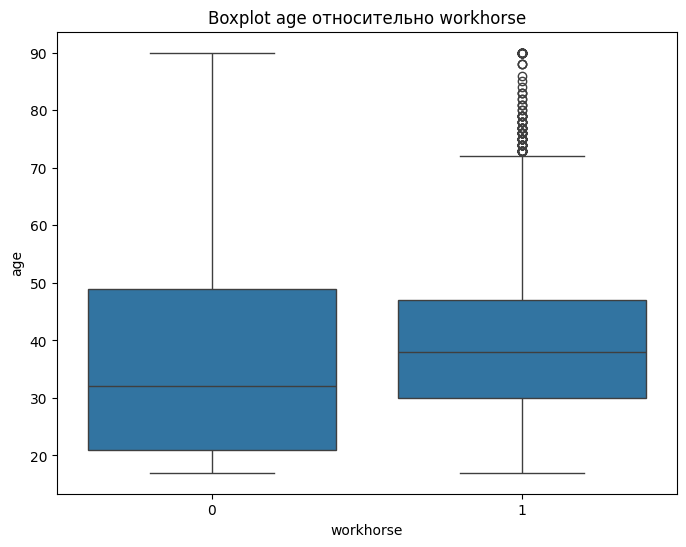

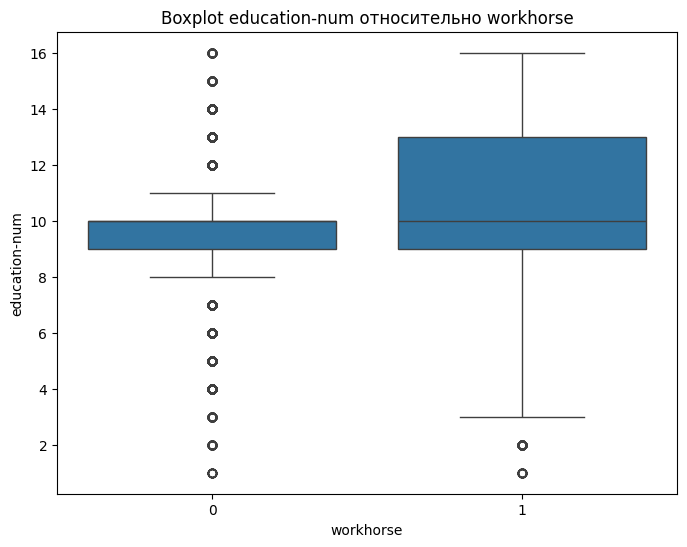

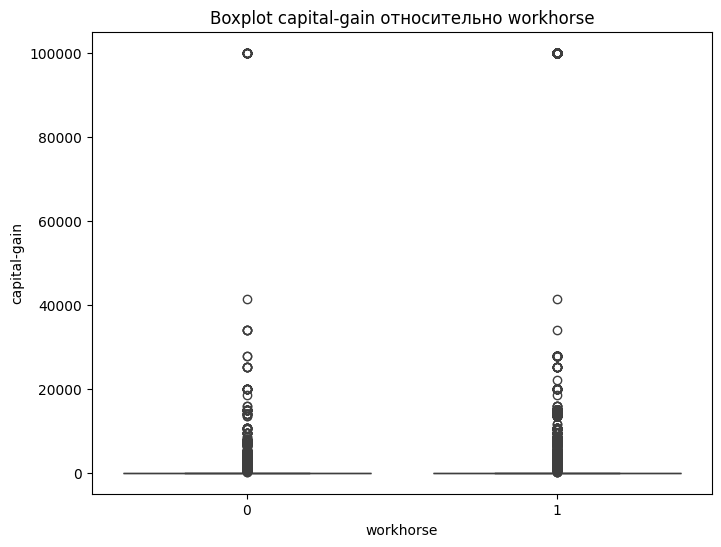

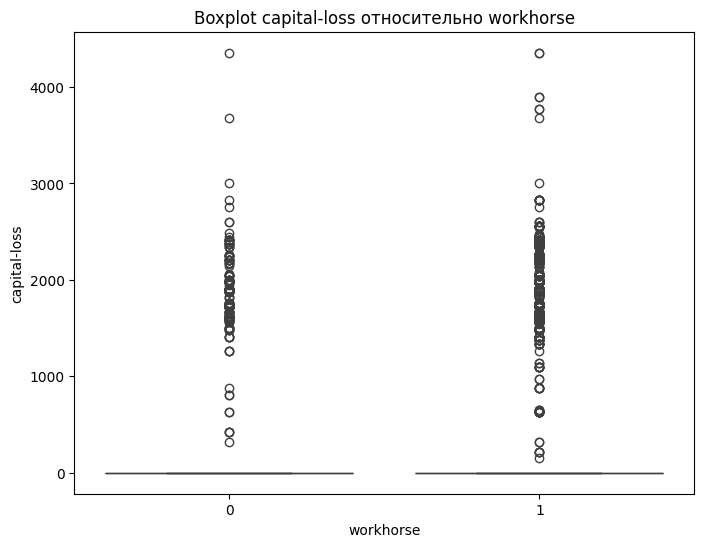

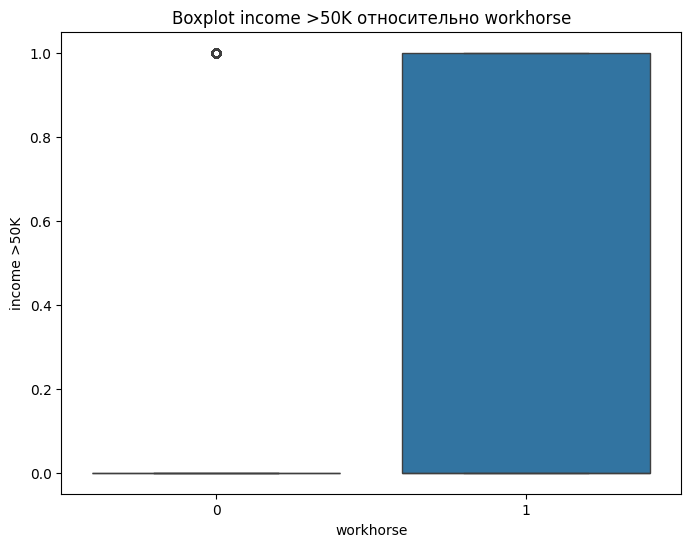

In [123]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='workhorse', y=col, data=df)
    plt.title(f'Boxplot {col} относительно workhorse')
    plt.show()

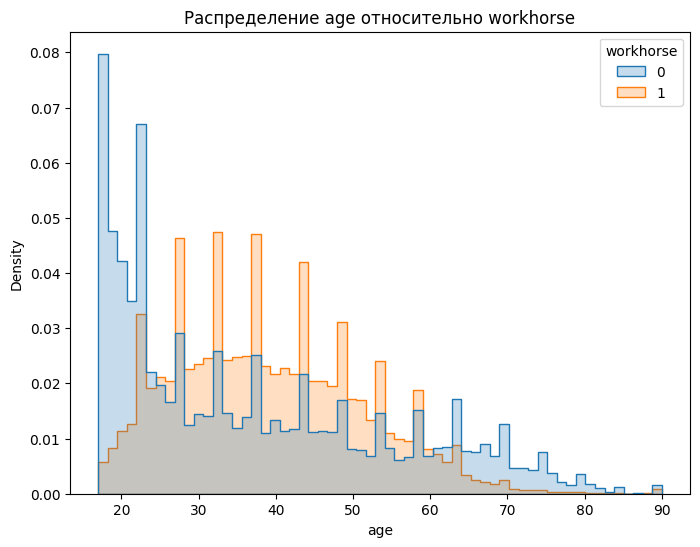

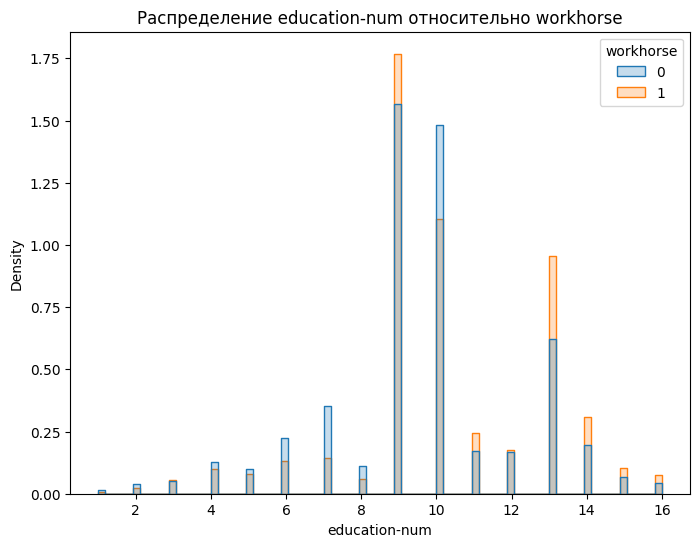

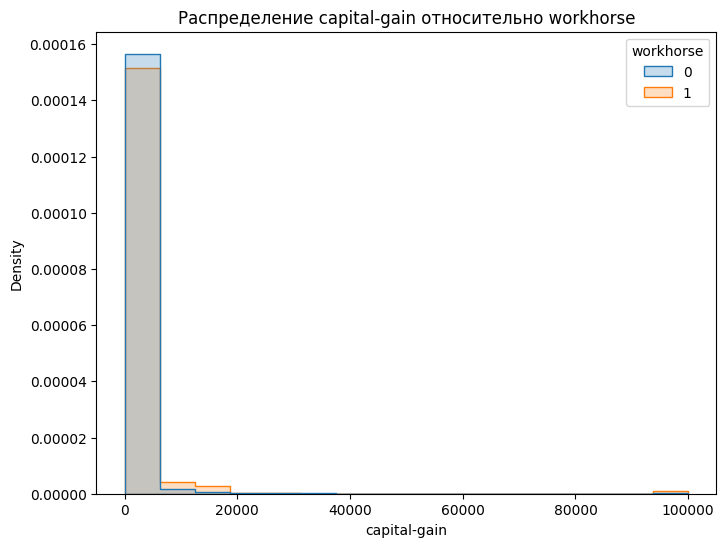

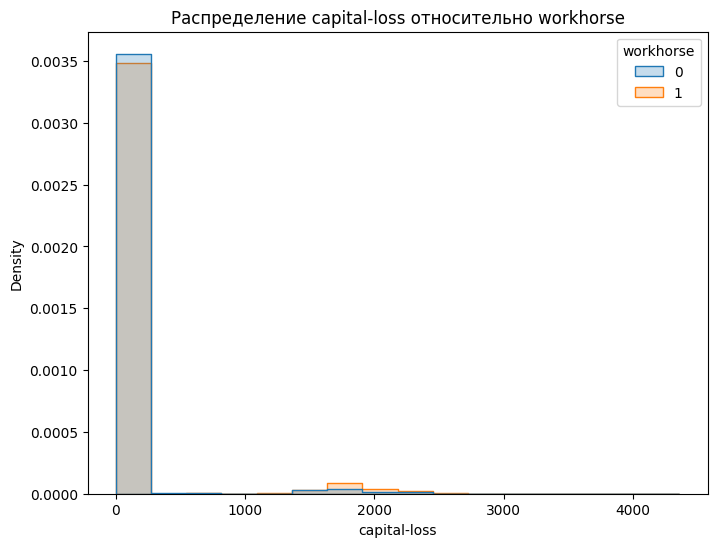

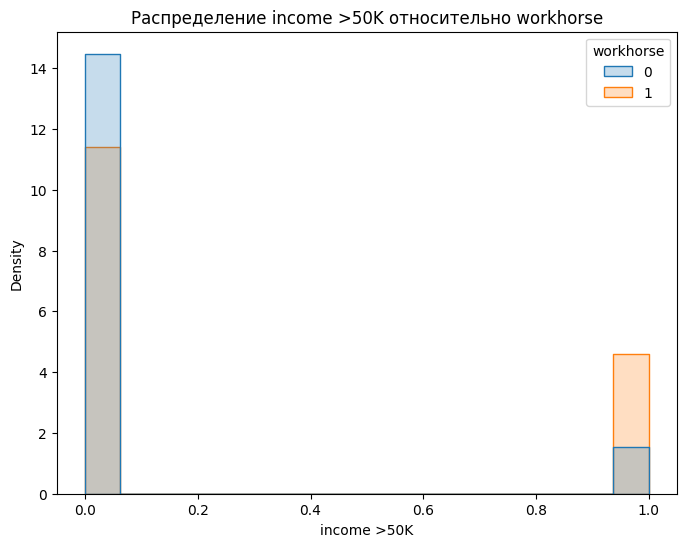

In [124]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='workhorse', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно workhorse')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y
## **Анализ графиков boxplot**
## **Первый график:** Сравнение с age
Выводы:
Люди, работающие 40 и более часов (workhorse = 1), имеют более высокий средний возраст (медиана около 40) по сравнению с теми, кто работает меньше (workhorse = 0), где медиана составляет примерно 32.
У группы с workhorse = 1 наблюдаются выбросы, что может указывать на наличие людей значительно старшего возраста, работающих более 40 часов.
В целом, можно сказать, что с увеличением возраста вероятность того, что человек будет работать более 40 часов, возрастает.
## **Второй график:** Сравнение с education-num
Выводы:
Группа с workhorse = 1 имеет более высокие годы образования (медиана 10) по сравнению с группой с workhorse = 0, где нет четкой медианы, но наблюдаются выбросы.
Это может указывать на то, что люди с более высоким уровнем образования имеют большую вероятность работать 40 часов и более.
Выбросы в обеих группах могут свидетельствовать о наличии людей с очень низким или высоким уровнем образования, но в целом, образование положительно коррелирует с работой более 40 часов.
## **Пятый график:** Сравнение с income >50k
Выводы:
Группа с workhorse = 1 имеет диапазон доходов выше 50k, что указывает на то, что работающие более 40 часов чаще имеют доход выше 50k.
В то время как группа с workhorse = 0 не имеет значений выше 0, это подчеркивает, что работающие менее 40 часов, вероятно, зарабатывают меньше.
Таким образом, можно сделать вывод, что работающие более 40 часов имеют значительно более высокий доход.
Общий вывод
На основе анализа боксплотов можно заключить, что работающие 40 и более часов (workhorse = 1) имеют тенденцию к более высокому возрасту, уровню образования и доходу, а также потенциально к более высокому капиталу.

## **Анализ диаграмм**
По первому графику видно, что большая часть людей среднего возраста работают больше или 40 часов в неделю, также из второй диаграммы видно, что эти люди в основном обучались 9 лет, но некоторые обучались 10 лет, но при этом работают меньше. Из третьего и четвертого графиков видно, что потеря и прирост капитала происходит больше у людей, работающих больше. Также из последней диаграммы видно, что работающие больше часов в неделю зарабатывают больше денег.

In [125]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('workhorse')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('workhorse')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [126]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('workhorse')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для age:

             count       mean        std   min   25%   50%   75%   max
workhorse                                                             
0           7763.0  36.781141  17.575974  17.0  21.0  32.0  49.0  90.0
1          24798.0  39.145294  12.094647  17.0  30.0  38.0  47.0  90.0


Описательная статистика для education-num:

             count       mean       std  min  25%   50%   75%   max
workhorse                                                          
0           7763.0   9.613036  2.520505  1.0  9.0  10.0  10.0  16.0
1          24798.0  10.227075  2.571480  1.0  9.0  10.0  13.0  16.0


Описательная статистика для capital-gain:

             count         mean          std  min  25%  50%  75%      max
workhorse                                                                
0           7763.0   574.440165  5316.979628  0.0  0.0  0.0  0.0  99999.0
1          24798.0  1235.178039  7916.087393  0.0  0.0  0.0  0.0  99999.0


Описательная статисти

In [127]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                        \
              count unique      top   freq     count unique      top  freq   
workhorse                                                                    
0              6823      8  Private   5165      7763     16  HS-grad  2278   
1             23902      8  Private  17531     24798     16  HS-grad  8223   

          marital-status         ...   race           sex                 \
                   count unique  ...    top   freq  count unique     top   
workhorse                        ...                                       
0                   7763      7  ...  White   6513   7763      2  Female   
1                  24798      7  ...  White  21303  24798      2    Male   

                 native-country                               
            freq          count unique            top   freq  
workhorse                                                     
0           4107           7647     39  United-States   6996  
1          18134          24331     41  United-States  22174  

[2 rows x 32 columns]

## **1. Age:**
Средний возраст людей, работающих менее 40 часов в неделю (workhorse = 0), составляет 36.78 лет, тогда как у работающих более 40 часов (workhorse = 1) средний возраст равен 39.15 лет. Это указывает на то, что более возрастные группы, вероятно, работают больше часов. Стандартное отклонение в обеих группах (17.58 для workhorse = 0 и 12.09 для workhorse = 1) говорит о том, что у группы с workhorse = 1 возраст более однороден. Минимальные значения в обеих группах составляют 17 лет, тогда как максимальные значения достигают 90 лет.

## **2. Education-num:**
Среднее количество лет образования у людей с workhorse = 0 составляет 9.61, что ниже, чем у группы с workhorse = 1, где это значение равно 10.23. Это может свидетельствовать о том, что более образованные люди склонны работать больше часов. Стандартное отклонение в обеих группах схоже (2.52 для workhorse = 0 и 2.57 для workhorse = 1), что говорит о схожей вариативности уровня образования. Минимальное значение в обеих группах равно 1, а максимальное — 16 лет.

## **3. Capital-gain:**
Среди людей с workhorse = 0 средний капитал составляет 574.44, в то время как у группы с workhorse = 1 этот показатель значительно выше — 1235.18. Это может указывать на то, что работающие более 40 часов имеют больше возможностей для получения капитальных выигрышей. Стандартное отклонение в группе workhorse = 1 (7916.09) значительно выше, чем в группе workhorse = 0 (5316.98), что может свидетельствовать о наличии выбросов. Минимальные значения капитальных выигрышей в обеих группах равны 0, а максимальные достигают 99999.

## **4. Capital-loss:**
Средние потери капитала в группе workhorse = 0 составляют 56.95, тогда как в группе workhorse = 1 они равны 96.81. Это может свидетельствовать о том, что работающие более 40 часов сталкиваются с большими финансовыми рисками. Стандартное отклонение в группе workhorse = 1 (423.84) также выше, что указывает на большую вариативность потерь капитала. Минимальные значения в обеих группах равны 0, а максимумы — 4356.

## **5. Income >50K:**
Доля людей с доходом выше 50K в группе workhorse = 0 составляет лишь 9.5%, тогда как в группе workhorse = 1 этот показатель значительно выше — 28.6%. Это подтверждает, что работающие более 40 часов имеют значительно более высокие шансы на получение высокого дохода. Стандартное отклонение в обеих группах (0.293 для workhorse = 0 и 0.452 для workhorse = 1) говорит о различиях в распределении доходов, но оба значения указывают на наличие значительного числа людей с низким доходом.

## **Вывод:**

Люди, работающие более 40 часов, имеют больший средний возраст и уровень образования, что может свидетельствовать о том, что более опытные и образованные люди чаще работают больше часов.
Средние капитальные выигрыши и потери капитала значительно выше у работающих более 40 часов, что может указывать на их большую финансовую активность и риски.
Доля людей с доходом выше 50K значительно выше в группе, работающей более 40 часов, что подтверждает предположение о положительной корреляции между количеством рабочих часов и уровнем дохода.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [128]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workhorse
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037,0.073855
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154,0.101703
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329,0.038124
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526,0.042148
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689,0.681800
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000,0.190714
workhorse,0.073855,0.101703,0.038124,0.042148,0.681800,0.190714,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [130]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'native-country', 'income >50K']


In [131]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True, dtype=int) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [132]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income >50K_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [133]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_90', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'educati

In [134]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
if numeric_features:  # Проверяем, есть ли числовые признаки
    try:
        X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
    except KeyError as e:
        print(f"Ошибка: {e}")
        print("Проверьте, какие колонки есть в X_processed:", X_processed.columns.tolist())
else:
    print("Нет числовых признаков для нормализации.")


In [135]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income >50K_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [136]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [137]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8107
Точность на тестовой выборке: 0.8062

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1553
           1       0.83      0.94      0.88      4960

    accuracy                           0.81      6513
   macro avg       0.75      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [138]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


               Feature  Coefficient
62              age_80    -2.294374
288  capital-loss_1719    -1.750285
11              age_29     1.749011
63              age_81    -1.731264
17              age_35     1.677676
..                 ...          ...
83   education_7th-8th     0.001143
215  capital-gain_5060     0.000000
271  capital-loss_1411     0.000000
153  capital-gain_1639     0.000000
69              age_87     0.000000

[388 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [139]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8056
Отклонение точности: 0.0030


In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

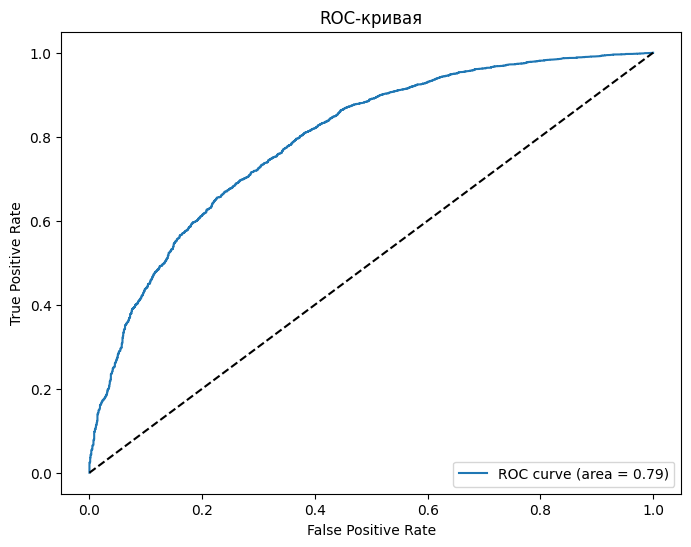

In [141]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---